# BLG407 – Çoklu Doğrusal Regresyon ve Flask GUI Projesi

**Adınız:** Amir  
**Soyadınız:** Elahmed  
**Okul Numaranız:** 123456789  
**GitHub Repo Bağlantısı:** https://github.com/Amirelahmed/MLP_Flask  

---

Bu projede, ev fiyatlarını tahmin etmek için çoklu doğrusal regresyon modeli
kurulmuş ve eğitilen model Flask tabanlı bir web arayüzü ile son kullanıcıya sunulmuştur.


In [27]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import statsmodels.api as sm
import pickle

pd.set_option("display.max_columns", None)

# Veri setini yükle
df = pd.read_csv("house_prices_dataset.csv")

df.head()


,area,rooms,age,city,price
0,162,1,24,Istanbul,183841
1,239,5,24,Bursa,187188
2,152,3,17,Istanbul,203849
3,74,4,22,Istanbul,144800
4,166,3,29,Ankara,184625


In [28]:
print("Veri seti boyutu:", df.shape)

print("\nİlk 5 gözlem:")
display(df.head())

print("\nBilgi:")
print(df.info())

print("\nÖzet istatistikler:")
display(df.describe())

print("\nEksik değer sayıları:")
display(df.isnull().sum())


Veri seti boyutu: (120, 5)

İlk 5 gözlem:


,area,rooms,age,city,price
0,162,1,24,Istanbul,183841
1,239,5,24,Bursa,187188
2,152,3,17,Istanbul,203849
3,74,4,22,Istanbul,144800
4,166,3,29,Ankara,184625



Bilgi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   area    120 non-null    int64 
 1   rooms   120 non-null    int64 
 2   age     120 non-null    int64 
 3   city    120 non-null    object
 4   price   120 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 4.8+ KB
None

Özet istatistikler:


,area,rooms,age,price
count,120.000000,120.000000,120.000000,120.000000
mean,152.650000,2.916667,14.700000,192226.850000
std,57.242614,1.393764,9.372407,73843.254771
min,61.000000,1.000000,0.000000,21920.000000
25%,107.750000,2.000000,5.750000,142208.250000
50%,148.000000,3.000000,15.000000,188856.000000
75%,195.000000,4.000000,23.000000,254237.500000
max,249.000000,5.000000,29.000000,349740.000000



Eksik değer sayıları:


,0
area,0
rooms,0
age,0
city,0
price,0


In [29]:
print("Veri seti boyutu:", df.shape)

print("\nİlk 5 gözlem:")
display(df.head())

print("\nBilgi:")
print(df.info())

print("\nÖzet istatistikler:")
display(df.describe())

print("\nEksik değer sayıları:")
display(df.isnull().sum())


Veri seti boyutu: (120, 5)

İlk 5 gözlem:


,area,rooms,age,city,price
0,162,1,24,Istanbul,183841
1,239,5,24,Bursa,187188
2,152,3,17,Istanbul,203849
3,74,4,22,Istanbul,144800
4,166,3,29,Ankara,184625



Bilgi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   area    120 non-null    int64 
 1   rooms   120 non-null    int64 
 2   age     120 non-null    int64 
 3   city    120 non-null    object
 4   price   120 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 4.8+ KB
None

Özet istatistikler:


,area,rooms,age,price
count,120.000000,120.000000,120.000000,120.000000
mean,152.650000,2.916667,14.700000,192226.850000
std,57.242614,1.393764,9.372407,73843.254771
min,61.000000,1.000000,0.000000,21920.000000
25%,107.750000,2.000000,5.750000,142208.250000
50%,148.000000,3.000000,15.000000,188856.000000
75%,195.000000,4.000000,23.000000,254237.500000
max,249.000000,5.000000,29.000000,349740.000000



Eksik değer sayıları:


,0
area,0
rooms,0
age,0
city,0
price,0


In [30]:
# Sayısal ve kategorik sütunlar
numeric_cols = ['area', 'rooms', 'age']
categorical_cols = ['city']

# Sayısal sütunlar için median ile doldurma
for col in numeric_cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

# Kategorik sütunlar için en sık değer ile doldurma
for col in categorical_cols:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)

print("Eksik değerler (doldurulduktan sonra):")
display(df.isnull().sum())

# Özellikler ve hedef değişken
features = ['area', 'rooms', 'age', 'city']   # max 10 kuralına uyuyor
target = 'price'

X = df[features]
y = df[target]


Eksik değerler (doldurulduktan sonra):


/tmp/ipython-input-2953719047.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
/tmp/ipython-input-2953719047.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

,0
area,0
rooms,0
age,0
city,0
price,0


In [31]:
# city için One-Hot Encoding (statsmodels için manuel)
X_encoded = pd.get_dummies(X, columns=['city'], drop_first=True)

# Sabit terim ekle
X_be = sm.add_constant(X_encoded)

# Tüm sütunları float'a çevir
X_be = X_be.astype(float)
y_be = y.astype(float)

X_be.head()


,const,area,rooms,age,city_Bursa,city_Istanbul,city_Izmir
0,1.0,162.0,1.0,24.0,0.0,1.0,0.0
1,1.0,239.0,5.0,24.0,1.0,0.0,0.0
2,1.0,152.0,3.0,17.0,0.0,1.0,0.0
3,1.0,74.0,4.0,22.0,0.0,1.0,0.0
4,1.0,166.0,3.0,29.0,0.0,0.0,0.0


In [32]:
def backward_elimination(X, y, sl=0.05):
    """
    X: sabit terim (const) dahil DataFrame
    y: hedef (Series veya 1D array)
    sl: significance level (0.05)
    """
    X_modeled = X.copy()

    while True:
        model = sm.OLS(y, X_modeled).fit()
        p_values = model.pvalues

        # const hariç en büyük p-value
        p_values_no_const = p_values.drop('const', errors='ignore')
        max_p = p_values_no_const.max()

        if max_p > sl:
            worst_feature = p_values_no_const.idxmax()
            print(f"Elenen değişken: {worst_feature} (p = {max_p:.4f})")
            X_modeled = X_modeled.drop(columns=[worst_feature])
        else:
            break

    final_model = sm.OLS(y, X_modeled).fit()
    return X_modeled, final_model

X_be_final, model_be_final = backward_elimination(X_be, y_be, sl=0.05)

print("\nSon durumda kullanılan değişkenler:")
print(list(X_be_final.columns))

print("\nNihai modelin özeti:")
print(model_be_final.summary())


Elenen değişken: rooms (p = 0.4909)

Son durumda kullanılan değişkenler:
['const', 'area', 'age', 'city_Bursa', 'city_Istanbul', 'city_Izmir']

Nihai modelin özeti:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     220.6
Date:                Wed, 26 Nov 2025   Prob (F-statistic):           6.94e-57
Time:                        11:55:33   Log-Likelihood:                -1372.9
No. Observations:                 120   AIC:                             2758.
Df Residuals:                     114   BIC:                             2774.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          

In [33]:
# Eğitim / test ayırma
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

numeric_features = ['area', 'rooms', 'age']
categorical_features = ['city']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

reg_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Modeli eğit
reg_model.fit(X_train, y_train)

# Tahminler
y_train_pred = reg_model.predict(X_train)
y_test_pred  = reg_model.predict(X_test)

# Metrikler
r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("EĞİTİM R² :", r2_train)
print("TEST   R² :", r2_test)
print("TEST   MAE:", mae_test)
print("TEST   MSE:", mse_test)


EĞİTİM R² : 0.9215473673855404
TEST   R² : 0.783418330395957
TEST   MAE: 22157.782396627164
TEST   MSE: 732429164.4254779


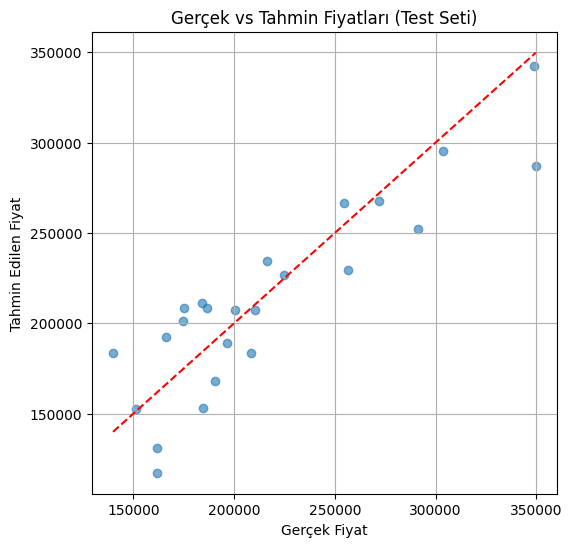

In [34]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.xlabel("Gerçek Fiyat")
plt.ylabel("Tahmin Edilen Fiyat")
plt.title("Gerçek vs Tahmin Fiyatları (Test Seti)")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.grid(True)
plt.show()


In [35]:
with open("model.pkl", "wb") as f:
    pickle.dump(reg_model, f)

print("✔ model.pkl dosyası başarıyla kaydedildi.")


✔ model.pkl dosyası başarıyla kaydedildi.


In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
!wget -q https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64.deb
!apt install ./cloudflared-linux-amd64.deb -y


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'cloudflared' instead of './cloudflared-linux-amd64.deb'
cloudflared is already the newest version (2025.11.1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


In [38]:
import threading
import time
import os

def run_flask():
    os.system("python3 app.py")

thread = threading.Thread(target=run_flask)
thread.start()

time.sleep(3)


In [39]:
!cloudflared tunnel --url http://127.0.0.1:5000 --no-autoupdate


2025-11-26T11:55:42Z INF Thank you for trying Cloudflare Tunnel. Doing so, without a Cloudflare account, is a quick way to experiment and try it out. However, be aware that these account-less Tunnels have no uptime guarantee, are subject to the Cloudflare Online Services Terms of Use (https://www.cloudflare.com/website-terms/), and Cloudflare reserves the right to investigate your use of Tunnels for violations of such terms. If you intend to use Tunnels in production you should use a pre-created named tunnel by following: https://developers.cloudflare.com/cloudflare-one/connections/connect-apps
2025-11-26T11:55:42Z INF Requesting new quick Tunnel on trycloudflare.com...
2025-11-26T11:55:45Z INF +--------------------------------------------------------------------------------------------+
2025-11-26T11:55:45Z INF |  Your quick Tunnel has been created! Visit it at (it may take some time to be reachable):  |
2025-11-26T11:55:45Z INF |  https://albert-wildlife-architect-grants.trycloudflar